# CNN Convolutional Neural Networks
### MNIST dataset_with_validation
#### 3 sets split: Train, Validatite, Test

https://classroom.udacity.com/courses/ud188/lessons/b1e148af-0beb-464e-a389-9ae293cb1dcd/concepts/f3acc3a4-83e7-4cfd-87c5-7b9a22d5a699



validation set solution:
http://localhost:8888/notebooks/Documents/olga_data_science_udacity_deep_learning_pytorch/convolutional-neural-networks/mnist-mlp/mnist_mlp_solution_with_validation.ipynb

What is a feature?
I’ve found that a helpful way to think about what a feature is, is to think about what we are visually drawn to when we first see an object and when we identify different objects. For example, what do we look at to distinguish a cat and a dog? The shape of the eyes, the size, and how they move are just a couple of examples of visual features.

As another example, say we see a person walking toward us and we want to see if it’s someone we know; we may look at their face, and even further their general shape, eyes (and even color of their eyes). The distinct shape of a person and their eye color a great examples of distinguishing features!

Next, we’ll see that features like these can be measured, and represented as numerical data, by a machine.


MNIST Data
The MNIST database is arguably the most famous database in the field of deep learning! Check out this figure that shows datasets referenced over time in NIPS papers.


### Multi-Layer Perceptron, MNIST
In this notebook, we will train an MLP to classify images from the MNIST database hand-written digit database.

The process will be broken down into the following steps:

Load and visualize the data
Define a neural network
Train the model
Evaluate the performance of our trained model on a test dataset!
Before we begin, we have to import the necessary libraries for working with data and PyTorch.

In [1]:
# import libraries
import torch
import numpy as np

##### Load and Visualize the Data
Downloading may take a few moments, and you should see your progress as the data is loading. You may also choose to change the batch_size if you want to load more data at a time.

This cell will create DataLoaders for each of our datasets.

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms
# to help training test data split
from torch.utils.data.sampler import SubsetRandomSampler


# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of data drom training set to use as validation 20%
#thats extra needed for validation
valid_size = 0.2

#convert data to Tensor
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
#and transforming them to Tensors
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# obtain training indices that will be used for validation
#check how many indices there are
num_train = len(train_data)
#list all possible indices by grabbing the length of the entire training set
#so these indices will be poiting to each of the 70000 images in the training set
indices = list(range(num_train))
#thah suffle these indices so that any index I select out of this list
#will reference a random piece of data
np.random.shuffle(indices)
#defining split boundary
#number of examples that I want to include in the validation set
#so it is 20% of training data
split = int(np.floor(valid_size * num_train))
#use this to get 80-20 split between training and validation
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


#now training data split into two sets by shuffling it and selecting
#20% for validation set using a specific data sampler
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

#### Visualize a Batch of Training Data
The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

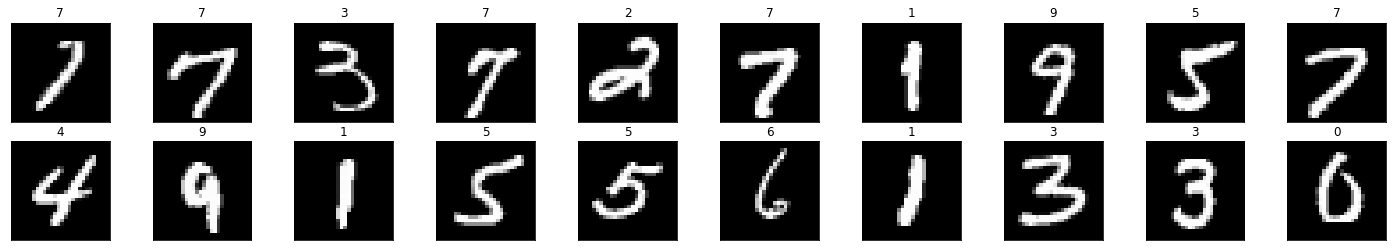

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

#### View an Image in More Detail

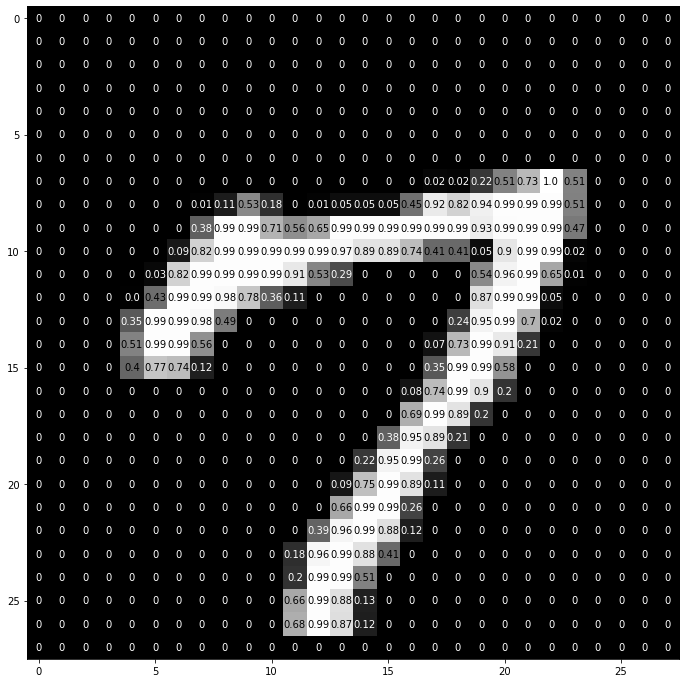

In [4]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

#### Define the Network Architecture
The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

3 fully connected layers
self.fc1 = nn.Linear(28 * 28, hidden_1)

self.fc2 = nn.Linear(hidden_1, hidden_2)

self.fc3 = nn.Linear(hidden_2, 10)

Output of third fully connected layer is 10 which is number of classes 0,1,2,3,4,5,6,7,8,9


In [5]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2) probability or 20%
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)        

        #how will input vector proceed throw layers, that is defined in forward function
        #start with input x - tensor 28x28
    def forward(self, x):
        # flatten image input
        #first step is to flatten it in 784 length vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        #once its flattened it will pass throw first fully connected layer
        #and appying an activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        #dropout a technique for overfitting
        #add dropout layer to prevent overfitting
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        #no activation function to last layer, that is because
        #later it will have softmax activation function applied to it
        x = self.fc3(x)
        #so this x should represent 10 class scores
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


##### Dropout (Regularization, tipically drop 20% to avoid overfitting, p=0.2 bernoulli variables)
https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf
https://www.machinecurve.com/index.php/2019/12/16/what-is-dropout-reduce-overfitting-in-your-neural-networks/
Dropout is a regularization technique that prevents neural networks from overfitting. Regularization methods like L2 and L1 reduce overfitting by modifying the cost function. Dropout, on the other hand, modify the network itself.

Deep neural networks contain multiple non-linear hidden layers which allow them to learn complex functions. But, if training data is not enough, the model might overfit. We use regularization techniques to reduce overfitting.


Dropout is a regularization technique that prevents neural networks from overfitting. Regularization methods like L1 and L2 reduce overfitting by modifying the cost function. Dropout on the other hand, modify the network itself. It randomly drops neurons from the neural network during training in each iteration

Deep neural nets with a large number of parameters are very powerful machine learning systems. However, overfitting is a serious problem in such networks. Large networks are also slow to use, making it difficult to deal with overfitting by combining the predictions of many different large neural nets at test time. Dropout is a technique for addressing this problem. The key idea is to randomly drop units (along with their connections) from the neural network during training. This prevents units from co-adapting too much. During training, dropout samples from an exponential number of different “thinned” networks. At test time, it is easy to approximate the effect of averaging the predictions of all these thinned networks by simply using a single unthinned network that has smaller weights. This significantly reduces overfitting and gives major improvements over other regularization methods. We show that dropout improves the performance of neural networks on supervised learning tasks in vision, speech recognition, document classification and computational biology, obtaining state-of-the-art results on many benchmark data sets.


How to choose best value for  p?
And they did find such a pattern: across multiple scenarios, a value of p≈0.5 for the hidden layers seems to result in the best performance when applying Dropout (Srivastava et al., 2014). This is true for all layers except the input one, where p must be ≈1.0. The latter is presumably the case because the input layer takes the input data, and it’s difficult to find patterns when data is dropped at random.

##### Activation functions
https://cs231n.github.io/neural-networks-1/#actfun
ReLU
ReLU. The Rectified Linear Unit has become very popular in the last few years. It computes the function f(x)=max(0,x). In other words, the activation is simply thresholded at zero (see image above on the left). There are several pros and cons to using the ReLUs:

(+) It was found to greatly accelerate (e.g. a factor of 6 in Krizhevsky et al.) the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form.
(+) Compared to tanh/sigmoid neurons that involve expensive operations (exponentials, etc.), the ReLU can be implemented by simply thresholding a matrix of activations at zero.
(-) Unfortunately, ReLU units can be fragile during training and can “die”. For example, a large gradient flowing through a ReLU neuron could cause the weights to update in such a way that the neuron will never activate on any datapoint again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. That is, the ReLU units can irreversibly die during training since they can get knocked off the data manifold. For example, you may find that as much as 40% of your network can be “dead” (i.e. neurons that never activate across the entire training dataset) if the learning rate is set too high. With a proper setting of the learning rate this is less frequently an issue.

#### Specify Loss Function and Optimizer
It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer and then calculates the log loss.

CrossEntropyLoss - calculates a softmax function on an output layer and then doing negative log loss. This means that you only need your model to produce class scores and then loss function will turn those into probabilities using a softmax function and calculate the loss.
https://pytorch.org/docs/stable/nn.html#crossentropyloss


https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss
This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.

It is useful when training a classification problem with C classes. If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. This is particularly useful when you have an unbalanced training set.

In [6]:
# specify loss function (categorical cross-entropy)
#pretty standard loss for any classification task
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) (takes mode parameters 
#and learning rate = 0.01
# if a loss is descreasing too slowly or sporadically you can change this value
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


#### Train the Network

Get to our training loop

The steps for training/learning from a batch of data are described in the comments below:

Clear the gradients of all optimized variables
Forward pass: compute predicted outputs by passing inputs to the model
Calculate the loss
Backward pass: compute gradient of the loss with respect to model parameters
Perform a single optimization step (parameter update)
Update average training loss
The following loop trains for 50 epochs; take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data.

In [7]:
# number of epochs to train the model
# 1 epoch means it sees every training images just once
#suggest something between 20 and 50
#suggest to start with at least 50 epochs for this dataset
n_epochs = 50


# initialize tracker for minimum validation loss over time
#specifically I'll track the minimum validation loss over time,
#so that I can compare it to the current validation loss
#to see if its increased or descreased from the mnimum over a given epic

#set initial minimum to infinity
#this high value guarantees that this loss will update after the first epic
valid_loss_min = np.Inf # set initial "min" to infinity



#so within epic loop we have our usual training batch loop and we also
#have a validation datch loop
#loop over each epoch and keep a track of the training loss
for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    #batch loop
    # here the train loader will load a batch of training data and we can
    # look at the images and the true labels for every image in that batch
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables that
        #pytorch has accumulated
        optimizer.zero_grad()
        #call in our model and perform forward pass
        # forward pass: compute predicted outputs by passing inputs to the model
        #return predicted class scores = output
        output = model(data)
        # calculate the loss
        #for comparison these predicted outputs and the true labels - target
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        #to complete backpropagation steps perform a backward pass to compute
        #gradient of the loss 
        loss.backward()
        # perform a single optimization step (parameter update)
        #this tep is responsible for updating the values of the weights in
        #out network
        optimizer.step()
        # update running training loss
        # is a loss value that's averaged over the batch
        #and in this case we want to record the accumulated loss over the batch
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    #validation loop, looping throw all our data in validation set
    #applying model to validation data and recording the loss
    #not performing backpropagation step here, as it is reserved only in
    #in training loop
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)    
                    
    # print training statistics 
    # calculate average loss over an epoch
    #train_loss divided by total number of images
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    
    #print after each epoch
    #print average validation loss after each epic, same as training loss
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    #check validation loss, if it is less that currently
    #recorded minimum
    #if it is, i am going to save the model
    #because that means that validation loss has decreased and I'll store
    #that as the new minimum value
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        #save the model and its current parameters after each epic
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss    

Epoch: 1 	Training Loss: 0.946473 	Validation Loss: 0.385196
Validation loss decreased (inf --> 0.385196).  Saving model ...
Epoch: 2 	Training Loss: 0.354996 	Validation Loss: 0.297105
Validation loss decreased (0.385196 --> 0.297105).  Saving model ...
Epoch: 3 	Training Loss: 0.279971 	Validation Loss: 0.244082
Validation loss decreased (0.297105 --> 0.244082).  Saving model ...
Epoch: 4 	Training Loss: 0.229138 	Validation Loss: 0.207284
Validation loss decreased (0.244082 --> 0.207284).  Saving model ...
Epoch: 5 	Training Loss: 0.195490 	Validation Loss: 0.182455
Validation loss decreased (0.207284 --> 0.182455).  Saving model ...
Epoch: 6 	Training Loss: 0.170654 	Validation Loss: 0.163278
Validation loss decreased (0.182455 --> 0.163278).  Saving model ...
Epoch: 7 	Training Loss: 0.150134 	Validation Loss: 0.146090
Validation loss decreased (0.163278 --> 0.146090).  Saving model ...
Epoch: 8 	Training Loss: 0.133637 	Validation Loss: 0.135139
Validation loss decreased (0.14609

Loss descreasing fast throw first epochs, but than slows down, however still decreasing.
Look at epoch 47, that is last time when model was saved, condition met, minimum validation loss more or equal than validation loss of current epic
valid_loss <= valid_loss_min

By saving the model at the point where the validation and training loss diverge I am preventing my model from overfitting the training data, this is also an issue of efficiency. We would see that our validation loss stays the same for the last 3 epochs here. So the lack of decreasing indication to me that the best model is really reached even around epic 47.

Now we can check how model performs on test data



#### Test the Trained Network
Finally, we test our best model on previously unseen test data and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

In [8]:
#load the model with the lowest validation loss
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [9]:
#iterate throw all the data in test litter

# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    #applied the model
    output = model(data)
    # calculate the loss
    #recorded test loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    #our model is returning a list of class scores
    #to isolate our predicted class, i am going to take the maximum value
    #of the scores and return it as our prediction
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # then compare predictions to out target label
    #this creates a list weather our prediction was correct or not
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    #then separate these into the 10 classes
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
#print accuracy for each class
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.059213

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 99% (1127/1135)
Test Accuracy of     2: 98% (1019/1032)
Test Accuracy of     3: 98% (996/1010)
Test Accuracy of     4: 98% (964/982)
Test Accuracy of     5: 97% (874/892)
Test Accuracy of     6: 98% (942/958)
Test Accuracy of     7: 97% (1000/1028)
Test Accuracy of     8: 97% (949/974)
Test Accuracy of     9: 97% (982/1009)

Test Accuracy (Overall): 98% (9824/10000)


overall accuracy is 98%, and all the digit classes are pretty consistent.
Model is worse for digits 5,7,8,9
This is pretty much the same result as a model without validation.
So even though we train model for 3 more epics, the results are about the same.
This makes sence, as validation loss is not changing much.
So weather we save a model after epic 47 or 50, the model should be pretty similar. This kind of behavior is also occuring because most of these images are very similar. The images are very prrocessed and all of the digits look the same. So in our non-validation case it didnt matter so much that our model trained for much longer, but in some cases you will get overfitting and choosing a model based on validation loss will be even more important.



#### Visualize Sample Test Results
This cell displays test images and their labels in this format: predicted (ground-truth). The text will be green for accurately classified examples and red for incorrect predictions.

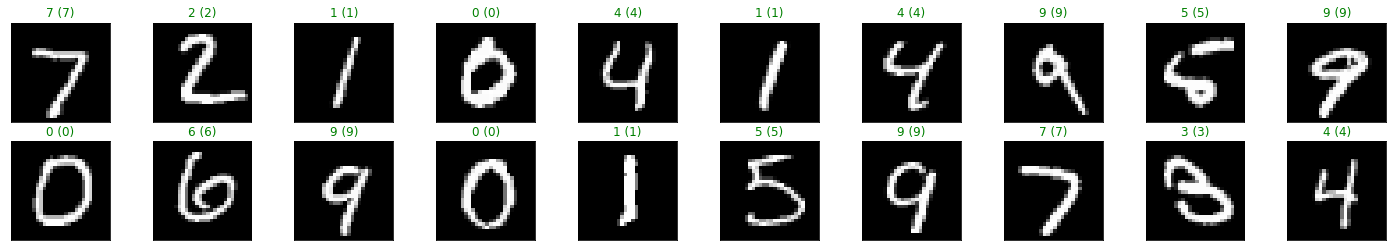

In [9]:
#included a cell where we can display test images and the predicted and true labels side by side

# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

##### Suggested to improve
Add another layer to our data
Even I wonder if I choose the right point to stop training this model.
I stopped training at 20 epochs (50 on udacity) based on only how I expected the loss to decrease over time.
So we need to use technique model validation to find out when to stop training.


### Model Validation

How many epochs should you train, that model is accurate but it is not overfitting the training data

One method is separate dataset into 3 sets: training, validation and test set
After each epoch we check how model is doing on validation set.
but it is important to note that model is not using any part of the validation set for the back propagation step.
We use training set to find all the patterns we can and to update and determine the weights of our model. The validation set only tess us if that model is doing well on the validation set.
The idea is, since the model doesnt use the validation set for deciding its weights that is can tell us if we're overfitting the training set of data. 
Finally, the test set of data is saved for checking the accuracy of the model after its trained.
Just check on a graoh loss vs number of epochs how well validation and training sets are doing.
So if you see a divide how the training and validation losses decrease, you'll want to stop changing the weights of your network around epoch 100 (see graph of loss) and ignore of throw away the weights from later epochs where there's evidence of overfitting.

This process can also prove useful if we have multiple models (potential architechtures) to choose from. for example, if you're deciding of the number of layers to put in the model, then you'll want to save the weights from each potential architecture for later comparison, and can choose to pick the model that gets the lowest validation loss.

Test dataset  data we never truely seen before. even model doest use weights from validation set, model selection process is based on how model performs on both the training and validation sets.
So in the end the model is biased  in favor of the validation set. 
Thus we need a separate test set of data to truly see how our selected model generalizes and performs when given data it really has not seen before.





### Image classification STEPS - PIPELINE
1. Load and visualize the data were working with
2. Pre-process the data by normalizing and converting it to a tensor, so its prepped for further procesing by the layers of a neural network
3. Do a research -> define a model
4. Train your model -> define loss and optimization functions and train your model
5. Consider using validation set, Save the best model
6. Test model on previously unseen data

The least test error we observed if we use CNN (convolutional neural networks)
Other classifiers:
http://yann.lecun.com/exdb/mnist/



Edge Handling
Kernel convolution relies on centering a pixel and looking at it's surrounding neighbors. So, what do you do if there are no surrounding pixels like on an image corner or edge? Well, there are a number of ways to process the edges, which are listed below. It’s most common to use padding, cropping, or extension. In extension, the border pixels of an image are copied and extended far enough to result in a filtered image of the same size as the original image.

Extend The nearest border pixels are conceptually extended as far as necessary to provide values for the convolution. Corner pixels are extended in 90° wedges. Other edge pixels are extended in lines.

Padding The image is padded with a border of 0's, black pixels.

Crop Any pixel in the output image which would require values from beyond the edge is skipped. This method can result in the output image being slightly smaller, with the edges having been cropped.
